In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
file_path = "C:/Users/Membo/Downloads/malaria data.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Country,Year,No. of cases,No. of deaths,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,WHO Region
0,Afghanistan,2017,630308[495000-801000],298[110-510],630308,495000.0,801000.0,298,110.0,510.0,Eastern Mediterranean
1,Algeria,2017,0,0,0,NaN,NaN,0,NaN,NaN,Africa
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa
3,Argentina,2017,0,0,0,NaN,NaN,0,NaN,NaN,Americas
4,Armenia,2017,0,0,0,NaN,NaN,0,NaN,NaN,Europe


In [3]:

# Import libraries
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Set dark theme
pio.templates.default = 'plotly_dark'

In [4]:
import pandas as pd

# Extract leading number before any bracket or other non-digit
df["No. of cases"] = df["No. of cases"].str.extract(r"(\d[\d,]*)")[0]

# Remove commas and convert to float
df["No. of cases"] = df["No. of cases"].str.replace(",", "").astype(float)

#  top 20
top20 = df.sort_values("No. of cases", ascending=False).head(20)



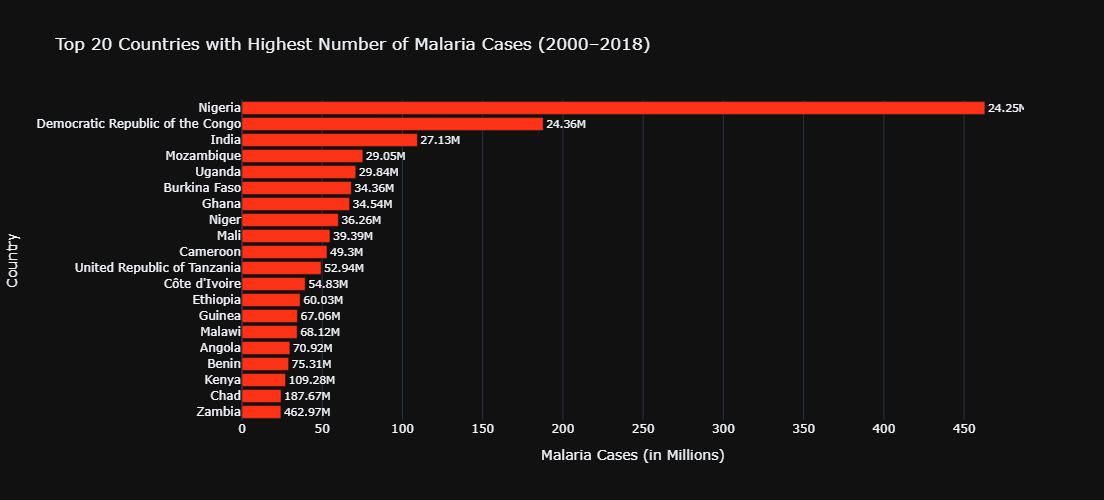

In [6]:
import plotly.express as px
import pandas as pd

# Group by country and sum
df_cases = df.groupby("Country", as_index=False)["No. of cases"].sum()

# Sort and select top 20
top20 = df_cases.sort_values("No. of cases", ascending=False).head(20)

# Convert to millions for readability
top20["Cases (millions)"] = top20["No. of cases"] / 1_000_000

# Create horizontal bar chart
fig = px.bar(
    top20.sort_values("Cases (millions)"),
    x="Cases (millions)",
    y="Country",
    text=top20["Cases (millions)"].round(2).astype(str) + "M",
    title="Top 20 Countries with Highest Number of Malaria Cases (2000–2018)",
    color_discrete_sequence=px.colors.qualitative.Light24,
    height=500,
    orientation="h"
)

fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title="Malaria Cases (in Millions)")
fig.show()



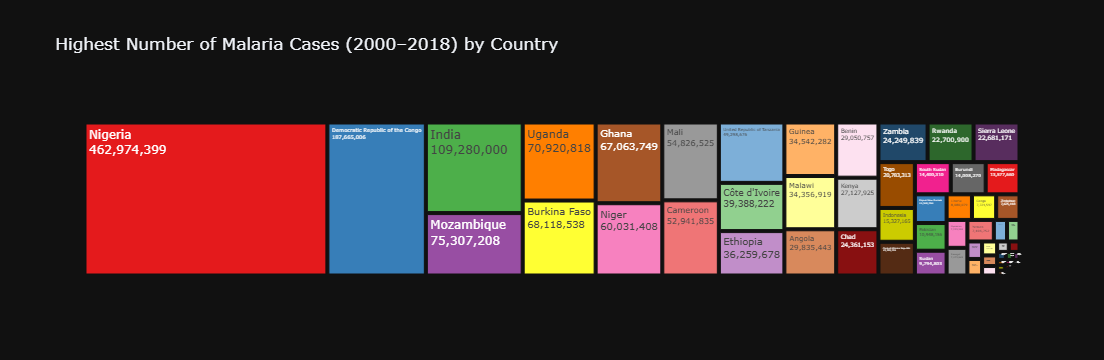

In [7]:
import pandas as pd
import plotly.express as px

# Convert to string before applying .str
df["No. of cases"] = df["No. of cases"].astype(str).str.extract(r"^(\d+)").astype(float)
df["No. of deaths"] = df["No. of deaths"].astype(str).str.extract(r"^(\d+)").astype(float)

# Treemap for Cases
def plot_treemap_cases(dataframe, variable, value):
    df_tmap = dataframe.groupby(variable, as_index=False)[value].sum()
    fig = px.treemap(
        df_tmap.sort_values(by=value, ascending=False),
        path=[variable],
        values=value,
        title=f"Highest Number of Malaria Cases (2000–2018) by {variable}",
        color_discrete_sequence=px.colors.qualitative.Set1
    )
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

plot_treemap_cases(df, "Country", "No. of cases")


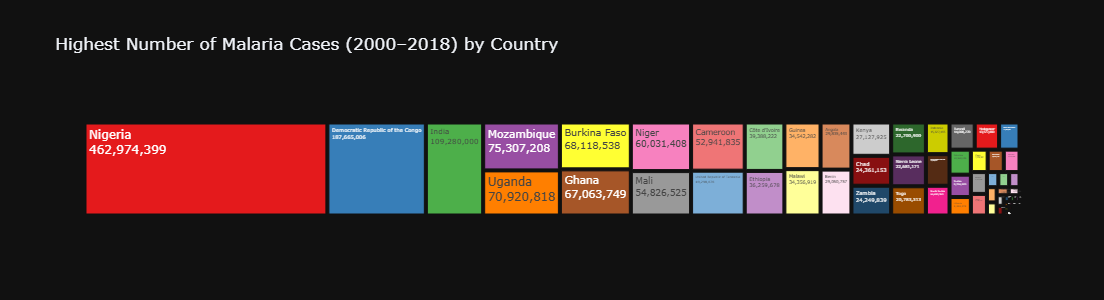

In [10]:
import pandas as pd
import plotly.express as px

# Convert to string before applying .str
df["No. of cases"] = df["No. of cases"].astype(str).str.extract(r"^(\d+)").astype(float)
df["No. of deaths"] = df["No. of deaths"].astype(str).str.extract(r"^(\d+)").astype(float)

# Treemap for Cases with smaller size and reduced label proportion
def plot_treemap_cases(dataframe, variable, value):
    df_tmap = dataframe.groupby(variable, as_index=False)[value].sum()

    fig = px.treemap(
        df_tmap.sort_values(by=value, ascending=False),
        path=[variable],
        values=value,
        title=f"Highest Number of Malaria Cases (2000–2018) by {variable}",
        color_discrete_sequence=px.colors.qualitative.Set1,
        width=600,  
        height=300   
    )

    # Reduce label density
    fig.update_traces(textinfo='label+value', textfont_size=12)

    fig.show()

plot_treemap_cases(df, "Country", "No. of cases")


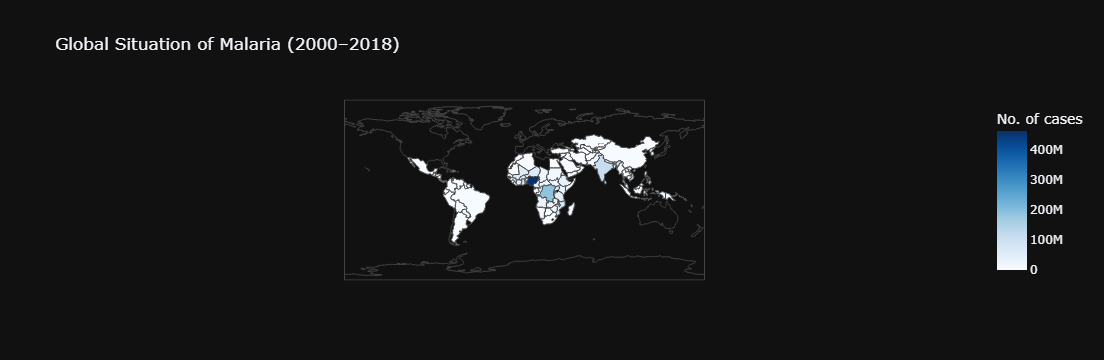

In [23]:
# Group for map
df_group = df.groupby("Country", as_index=False)[["No. of cases"]].sum()

fig = px.choropleth(
    df_group,
    locationmode="country names",
    locations="Country",
    hover_data=["Country", "No. of cases"],
    hover_name="Country",
    color="No. of cases",
    title="Global Situation of Malaria (2000–2018)",
    color_continuous_scale="Blues"
)
fig.show()


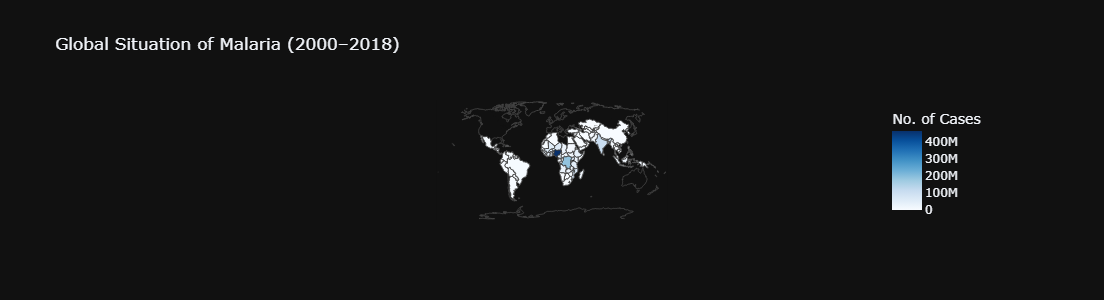

In [13]:
import plotly.express as px

# Group for map
df_group = df.groupby("Country", as_index=False)[["No. of cases"]].sum()

# Create choropleth map
fig = px.choropleth(
    df_group,
    locations="Country",
    locationmode="country names",
    hover_name="Country",
    hover_data=["No. of cases"],
    color="No. of cases",
    title="Global Situation of Malaria (2000–2018)",
    color_continuous_scale="Blues"
)

# Reduce size and reposition legend 
fig.update_layout(
    width=600,
    height=300,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="natural earth"
    ),
    coloraxis_colorbar=dict(
        title="No. of Cases",
        x=0.85 
    )
)

fig.show()


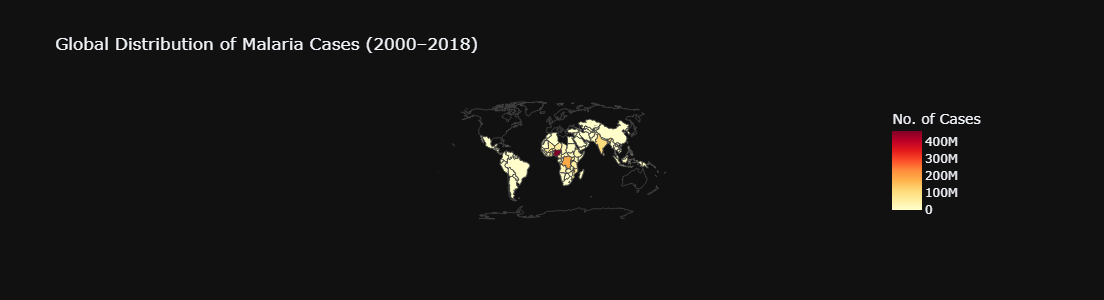

In [16]:
import plotly.express as px

# Group data by country
df_group = df.groupby("Country", as_index=False)["No. of cases"].sum()

# Choropleth with a brighter and more vivid color scale
fig = px.choropleth(
    df_group,
    locations="Country",
    locationmode="country names",
    color="No. of cases",
    hover_name="Country",
    hover_data=["No. of cases"],
    color_continuous_scale="YlOrRd",  # brighter gradient (Yellow-Orange-Red)
    title="Global Distribution of Malaria Cases (2000–2018)"
)
# Reduce size and reposition legend 
fig.update_layout(
    width=600,
    height=300,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="natural earth"
    ),
    coloraxis_colorbar=dict(
        title="No. of Cases",
        x=0.85 
    ))

fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()

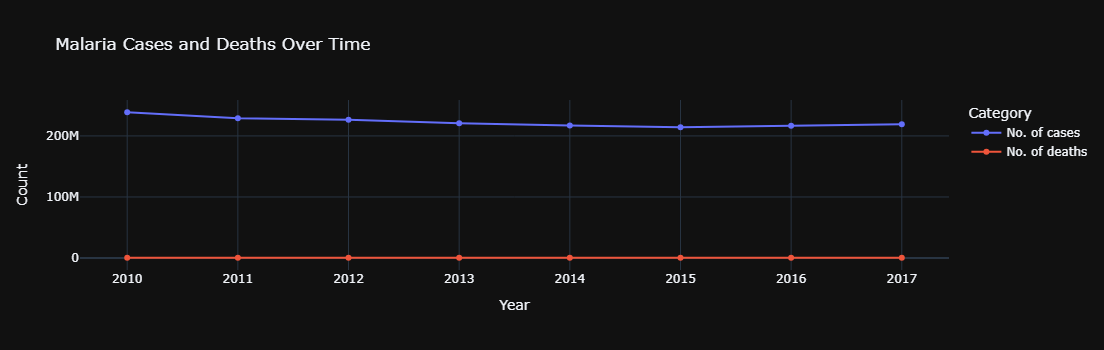

In [18]:
df_line = df.groupby(["Year"], as_index=False)[["No. of cases", "No. of deaths"]].sum()

fig = px.line(
    df_line,
    x="Year",
    y=["No. of cases", "No. of deaths"],
    title="Malaria Cases and Deaths Over Time",
    labels={"value": "Count", "variable": "Category"},
    markers=True
)
# Line + marker mode, and reduced size
fig.update_traces(mode='lines+markers')
fig.update_layout(
    width=500, 
    height=350
)
fig.update_traces(mode='lines+markers')
fig.show()


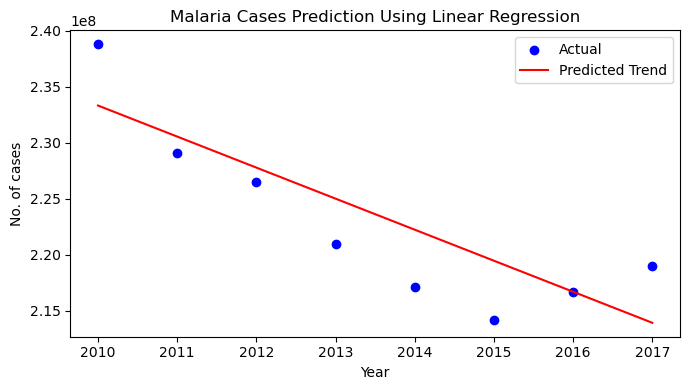

Mean Squared Error: 15041181770152.00


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# using Year as a predictor
df_model = df.groupby("Year")["No. of cases"].sum().reset_index()
X = df_model[["Year"]]
y = df_model["No. of cases"]

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Plot
plt.figure(figsize=(7, 4))
plt.scatter(X, y, color="blue", label="Actual")
plt.plot(X, model.predict(X), color="red", label="Predicted Trend")
plt.title("Malaria Cases Prediction Using Linear Regression")
plt.xlabel("Year")
plt.ylabel("No. of cases")
plt.legend()
plt.tight_layout()
plt.show()

print(f"Mean Squared Error: {mse:.2f}")
